In [100]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [101]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[2]
Data_base_learning_v2 = main_path+open_folder[3]
Points_equipe = main_path+open_folder[3]
Teams_puissance = main_path+open_folder[5]

In [102]:
train_csv = pd.read_csv(Data_base_learning_v2,sep=";",encoding="utf-8")
display(train_csv)

,Unnamed: 0,date,idHomeTeam,idAwayTeam,homeTeam,awayTeam,score,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,goalHomeTeam_FullTime,goalAwayTeam_FullTime,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam
0,0,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,2.0,0,2,0,3,-1,-1,-1,-1,2409,6154
1,1,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,2.0,0,0,0,2,-1,-1,-1,-1,4008,3054
2,2,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,2.0,0,1,0,1,-1,-1,-1,-1,3029,100
3,3,2019-08-10,522,530,OGC Nice,Amiens SC,1.0,1,0,2,1,-1,-1,-1,-1,2803,2045
4,4,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,0.0,1,0,1,1,-1,-1,-1,-1,2156,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1714,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,1.0,1,0,1,0,1,2,0,0,6154,9319
1287,1715,2020-03-10,95,102,Valencia CF,Atalanta BC,2.0,1,2,3,4,0,4,0,0,9770,7928
1288,1716,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,1.0,2,0,3,0,1,0,0,0,9221,6821
1289,1717,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,1.0,2,0,2,0,2,2,0,0,9495,7276


In [99]:
X = train_csv.drop(['idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalAwayTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime'],axis=1).values
X = X[:,1:]
Y = train_csv.drop(['idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_FullTime','goalAwayTeam_FullTime','win_cons_home','win_cons_away','lose_cons_home','lose_cons_away','puissance_homeTeam','puissance_awayTeam'],axis=1).values
Y = Y[:,1:]
# Y = train_csv['score'].values
# X[0]
X

array([[   -1,    -1,    -1,    -1,  2409,  6154],
       [   -1,    -1,    -1,    -1,  4008,  3054],
       [   -1,    -1,    -1,    -1,  3029,   100],
       ...,
       [    1,     0,     0,     0,  9221,  6821],
       [    2,     2,     0,     0,  9495,  7276],
       [    1,     0,     0,     0, 14695,  9329]], dtype=int64)

In [12]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)

(1032, 6) (1032, 2)


In [13]:
x_train

array([[   3,    0,    0,    1, 9319, 8083],
       [   0,    0,    0,    0, 3100,  100],
       [   0,    0,    0,    3, 3781, 6821],
       ...,
       [   0,    0,    4,    1, 2045,  100],
       [   0,    0,    0,    1, 9035, 1932],
       [  -1,   -1,   -1,   -1, 2817, 2512]], dtype=int64)

In [133]:
def create_model():
    
#     model = Sequential()
#     model.add(Dense(6, input_dim=x_train.shape[1], activation='relu'))
#     model.add(Dense(6, activation='softmax'))
#     model.compile(loss="sparse_categorical_crossentropy",
#                   optimizer=Adam(),
#                   metrics=["accuracy"])
    
    model = Sequential()
    model.add(Dense(2, input_dim=6, activation="relu"))
    model.add(Dense(2,activation = "softmax"))
    model.compile(loss="mse", optimizer="adam")
    return model

In [134]:
model = create_model()
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 2)                 14        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 6         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
None


In [135]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=60,epochs=200)

Train on 1032 samples, validate on 259 samples
Epoch 1/200
1032/1032 [==============================] - 0s 371us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 2/200
1032/1032 [==============================] - 0s 37us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 3/200
1032/1032 [==============================] - 0s 40us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 4/200
1032/1032 [==============================] - 0s 38us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 5/200
1032/1032 [==============================] - 0s 42us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 6/200
1032/1032 [==============================] - 0s 37us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 7/200
1032/1032 [==============================] - 0s 38us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 8/200
1032/1032 [==============================] - 0s 40us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 9/200
1032/1032 [==============================] - 0s 37us/sample - loss: 0.7713 - val_loss: 0.884

1032/1032 [==============================] - 0s 40us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 78/200
1032/1032 [==============================] - 0s 37us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 79/200
1032/1032 [==============================] - 0s 36us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 80/200
1032/1032 [==============================] - 0s 34us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 81/200
1032/1032 [==============================] - 0s 36us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 82/200
1032/1032 [==============================] - 0s 42us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 83/200
1032/1032 [==============================] - 0s 38us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 84/200
1032/1032 [==============================] - 0s 34us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 85/200
1032/1032 [==============================] - 0s 35us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 86/200
1032/1032 [==========================

1032/1032 [==============================] - 0s 37us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 154/200
1032/1032 [==============================] - 0s 36us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 155/200
1032/1032 [==============================] - 0s 32us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 156/200
1032/1032 [==============================] - 0s 36us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 157/200
1032/1032 [==============================] - 0s 39us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 158/200
1032/1032 [==============================] - 0s 38us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 159/200
1032/1032 [==============================] - 0s 39us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 160/200
1032/1032 [==============================] - 0s 37us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 161/200
1032/1032 [==============================] - 0s 33us/sample - loss: 0.7713 - val_loss: 0.8842
Epoch 162/200
1032/1032 [=================

In [136]:
ypred = model.predict(x_test)
print("y1 MSE:%.4f" % mean_squared_error(y_test[:,0], ypred[:,0])) 
print("y2 MSE:%.4f" % mean_squared_error(y_test[:,1], ypred[:,1]))

y1 MSE:0.8610
y2 MSE:0.9073


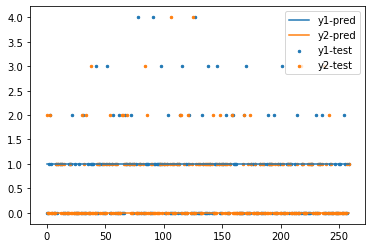

In [130]:
x_ax = range(len(x_test))
plt.scatter(x_ax, y_test[:,0],  s=6, label="y1-test")
plt.plot(x_ax, ypred[:,0], label="y1-pred")
plt.scatter(x_ax, y_test[:,1],  s=6, label="y2-test")
plt.plot(x_ax, ypred[:,1], label="y2-pred")
plt.legend()
plt.show()

In [131]:
predictions = model.predict((x_test, y_test))

In [132]:
print(x_test[255])
print(y_test[255])
plt.show()
preds = model.predict((x_test, y_test))
print(preds[255])
# np.argmax(predictions[98])

[   5    1    0    0 9319  100]
[1 0]
[1. 0.]


## Prédiction Unique mi-temps

In [114]:
puissance_homeTeam = 0
puissance_awayTeam = 4523998
win_cons_home = -1
win_cons_away = -1
lose_cons_home = -1
lose_cons_away= -1
predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
predictions1

array([[1., 0.]], dtype=float32)

In [115]:
unique = train_csv.values
goalHHalf_time = []
for i in unique:
    puissance_homeTeam = i[15]
    puissance_awayTeam = i[16]
    win_cons_home = i[11]
    win_cons_away = i[12]
    lose_cons_home = i[13]
    lose_cons_away= i[14]
    predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
    goal = predictions1
    goalHHalf_time.append(goal)
    print(goal,puissance_homeTeam,puissance_awayTeam)


[[1. 0.]] 2409 6154
[[1. 0.]] 4008 3054
[[1.000000e+00 6.467871e-17]] 3029 100
[[1. 0.]] 2803 2045
[[1. 0.]] 2156 1065
[[1. 0.]] 2690 2298
[[1. 0.]] 100 3749
[[1. 0.]] 4207 3029
[[1. 0.]] 3627 1736
[[1. 0.]] 9495 2020
[[1. 0.]] 6154 2690
[[1. 0.]] 3029 4008
[[1. 0.]] 2298 3029
[[1.000000e+00 1.909787e-15]] 1065 100
[[1. 0.]] 2020 2803
[[1. 0.]] 1736 2409
[[1. 0.]] 2045 4207
[[1. 0.]] 3749 2156
[[1. 0.]] 3054 3627
[[1. 0.]] 100 9495
[[1. 0.]] 2156 3054
[[1. 0.]] 2690 1736
[[1. 0.]] 100 2298
[[1. 0.]] 2045 3029
[[1. 0.]] 2409 2020
[[1.000000e+00 7.932344e-17]] 3627 100
[[1. 0.]] 9495 1065
[[1. 0.]] 3029 6154
[[1. 0.]] 4207 3749
[[1. 0.]] 2803 4008
[[1. 0.]] 1736 9495
[[1. 0.]] 6154 2298
[[1. 0.]] 1065 2045
[[1.0000000e+00 2.5298336e-16]] 2690 100
[[1. 0.]] 3029 3029
[[1. 0.]] 2020 2156
[[1. 0.]] 100 2803
[[1. 0.]] 3054 4207
[[1. 0.]] 3627 2409
[[1. 0.]] 4008 3749
[[1. 0.]] 4207 2690
[[1. 0.]] 2045 6154
[[1. 0.]] 9495 3627
[[1. 0.]] 3029 2803
[[1. 0.]] 2298 1736
[[1.0000000e+00 5.0484005e

[[1. 0.]] 2705 3890
[[1. 0.]] 2817 8832
[[1. 0.]] 4146 5188
[[1. 0.]] 3982 6821
[[1. 0.]] 1880 2817
[[1. 0.]] 8832 4146
[[1. 0.]] 3890 2482
[[1. 0.]] 6821 3883
[[1. 0.]] 3781 2705
[[1. 0.]] 2956 3982
[[1. 0.]] 5188 7938
[[1. 0.]] 7311 1553
[[1. 0.]] 7151 2512
[[1. 0.]] 14695 10390
[[1. 0.]] 2705 6821
[[1. 0.]] 7938 2956
[[1. 0.]] 3982 1880
[[1. 0.]] 4146 14695
[[1. 0.]] 2512 5188
[[1. 0.]] 2817 3781
[[1. 0.]] 2482 7311
[[1. 0.]] 10390 8832
[[1. 0.]] 3883 7151
[[1. 0.]] 1553 3890
[[1. 0.]] 3890 10390
[[1. 0.]] 14695 2512
[[1. 0.]] 8832 2705
[[1. 0.]] 6821 2482
[[1. 0.]] 3781 4146
[[1. 0.]] 2956 2817
[[1. 0.]] 7311 3883
[[1. 0.]] 1880 7938
[[1. 0.]] 7151 1553
[[1. 0.]] 5188 3982
[[1. 0.]] 4146 2482
[[1. 0.]] 3781 10390
[[1. 0.]] 7311 2705
[[1. 0.]] 7151 6821
[[1. 0.]] 5188 2817
[[1. 0.]] 8832 1553
[[1. 0.]] 2956 1880
[[1. 0.]] 14695 3982
[[1. 0.]] 3883 3890
[[1. 0.]] 7938 2512
[[1. 0.]] 3982 8832
[[1. 0.]] 6821 3781
[[1. 0.]] 2817 4146
[[1. 0.]] 2482 14695
[[1. 0.]] 10390 7151
[[1. 0.]] 

[[1. 0.]] 7447 3663
[[1. 0.]] 5396 3267
[[1. 0.]] 13105 4554
[[1. 0.]] 3663 3861
[[1.000000e+00 3.607831e-17]] 4554 100
[[1. 0.]] 7881 9770
[[1. 0.]] 4059 5396
[[1. 0.]] 9329 4803
[[1. 0.]] 6273 2475
[[1. 0.]] 7427 6139
[[1. 0.]] 3267 8949
[[1. 0.]] 4059 7447
[[1. 0.]] 4257 13105
[[1. 0.]] 9770 9329
[[1. 0.]] 2475 3663
[[1. 0.]] 13105 7881
[[1. 0.]] 5396 4554
[[1. 0.]] 4803 4059
[[1. 0.]] 7447 6273
[[1. 0.]] 100 4257
[[1. 0.]] 6139 3267
[[1. 0.]] 8949 4059
[[1. 0.]] 4257 2475
[[1.0000000e+00 2.7041203e-17]] 4059 100
[[1. 0.]] 13105 3861
[[1. 0.]] 7427 9770
[[1. 0.]] 4554 8949
[[1. 0.]] 3267 4803
[[1. 0.]] 3663 6139
[[1. 0.]] 4059 6273
[[1. 0.]] 7881 7447
[[1. 0.]] 9329 5396
[[1. 0.]] 7427 4059
[[1. 0.]] 3861 4554
[[1. 0.]] 9770 4257
[[1. 0.]] 100 3663
[[1. 0.]] 4803 4059
[[1. 0.]] 7447 3267
[[1. 0.]] 6139 5396
[[1. 0.]] 6273 9329
[[1. 0.]] 2475 7881
[[1. 0.]] 8949 13105
[[1. 0.]] 3663 9770
[[1. 0.]] 3861 2475
[[1. 0.]] 9329 7447
[[1. 0.]] 13105 7427
[[1. 0.]] 7881 4059
[[1. 0.]] 3267 6

[[1.0000000e+00 1.6060545e-17]] 4032 100
[[1.000000e+00 5.535428e-10]] 100 100
[[1. 0.]] 210 3270
[[1. 0.]] 890 2769
[[1.0000000e+00 6.0516554e-21]] 1735 136
[[1. 0.]] 4858 2302
[[1.0000000e+00 4.1907527e-15]] 651 100
[[1.000000e+00 2.494969e-37]] 195 1054
[[1.0000000e+00 1.4122049e-18]] 100 498
[[1.0000000e+00 4.5017216e-29]] 5551 178
[[1. 0.]] 178 5551
[[1.0000000e+00 2.7222222e-32]] 3270 210
[[1. 0.]] 2302 4858
[[1. 0.]] 136 1735
[[1. 0.]] 100 4032
[[1.0000000e+00 1.4285878e-36]] 2478 244
[[1. 0.]] 6497 2877
[[1.000000e+00 7.356684e-15]] 498 100
[[1. 0.]] 2769 890
[[1.000000e+00 6.766965e-29]] 1054 195
[[1.0000000e+00 4.2575704e-10]] 100 100
[[1. 0.]] 3270 1054
[[1. 0.]] 3673 8164
[[1. 0.]] 2478 1735
[[1. 0.]] 8036 4168
[[1.0000000e+00 5.2797666e-10]] 100 100
[[1. 0.]] 5313 6206
[[1. 0.]] 100 6497
[[1.000000e+00 5.535428e-10]] 100 100
[[1. 0.]] 4858 5551
[[1. 0.]] 651 2769
[[1. 0.]] 1054 3270
[[1. 0.]] 2769 651
[[1. 0.]] 4168 8036
[[1.0000000e+00 4.6006698e-10]] 100 100
[[1. 0.]] 17

In [141]:
predictions1[0][0]

1.0

In [ ]:
# predictions1train_csv = pd.read_csv(Data_base_learning_v2,sep=";",encoding="utf-8")
#display(train_csv)

In [19]:
# plt.plot(history.history['accuracy'],label='Accuracy')#bleu
# plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

In [5]:
# X2 = train_csv.drop(['idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime','score'],axis=1).values
# X2 = X[:,1:]
# Y2 = train_csv['goalHomeTeam_HalfTime']
# Y2.unique()

In [ ]:
df = 